## Regressions at the country level

In [200]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
import seaborn as sns
import numpy as np
from stargazer.stargazer import Stargazer

xr.set_options(display_expand_attrs=False, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

In [201]:
data = pd.read_csv('data.csv')
data.head()

,time,region,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,coef,temperature_change,gross_domestic_product_nominal,average_disposable_income_per_capita,equation,damage,log_gross_domestic_product_nominal,log_temperature_change,log_coef,log_damage,index,pop_est,REGIONS 35 I
0,2005.0,BELGIUM,0.845784,47058.691018,1.714491,0.581072,0.845,458081.623996,24767.399895,define_tot_eq_define_total_impact,545.471688,13.034803,-0.168419,-0.542881,6.301651,Belgium,11484055.0,BELGIUM
1,2005.0,BULGARIA,0.845784,47058.691018,1.714491,0.131897,0.845,49342.067424,4290.060541,define_tot_eq_define_total_impact,13.336815,10.806532,-0.168419,-2.025734,2.590528,Bulgaria,6975761.0,BULGARIA
2,2005.0,CROATIA,0.845784,47058.691018,1.714491,0.213121,0.845,49378.731850,7565.730576,define_tot_eq_define_total_impact,21.565789,10.807275,-0.168419,-1.545896,3.071108,Croatia,4067500.0,CROATIA
3,2005.0,CYPRUS,0.845784,47058.691018,1.714491,0.384869,0.845,20251.576648,15217.411656,define_tot_eq_define_total_impact,15.972441,9.915988,-0.168419,-0.954853,2.770865,Cyprus,1198575.0,CYPRUS
4,2005.0,DENMARK,0.845784,47058.691018,1.714491,0.656530,0.845,296616.284738,28613.689785,define_tot_eq_define_total_impact,399.070358,12.600195,-0.168419,-0.420786,5.989138,Denmark,5818553.0,DENMARK


In [202]:
df_melted = pd.read_csv('df_melted.csv')
df_melted.shape

(5595, 11)

### General model

As explained in the conceptual framework, our goal here is to quantifiy how important are each factors in terms of explaining the variation of the explained variable. 

We have distinguished three types of parameters : 

- **physical parameters**, such as temperature, carbon dioxyide concentration, radiative forcing, etc. These directly represent the physical aspect of climate change
- **methodological parameters**, such as the model used, the number of variables, the level of complexity, etc. These represent parameters that rely with the model, from a technical prospective
- **ethical parameters**, such as the discount rate, the normalisation factor or other parameters that take account of ethical considerations

We argue that an integrated assessment model is composed of these three types of parameters. The role of physical variables in the functionning of the model is its primary purpose; the variation between one model and another one has been widely discussed and quantified in the litterature. However, we believe that the ethical variables play a significant role in the determination of the output of the model. 

Hence, we define an econometric model to asses the role of each of the variables in the output of the model. 

The explained variable is the level of damage. Indeed, it is the primary goal of damage functions to assess the level of damages, so we have comparable values  accros models. Moreover, it is a quantified value, so it allows a quantitative evaluation. 

We consider a linear model. The explained variables are a combination of physical, methodological and ethical variables. 

### Simple model : only temperature change

In [203]:
reg_temp = smf.ols('log_damage ~ temperature_change', data=data).fit()
reg_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_damage   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     2351.
Date:                Thu, 12 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:22:04   Log-Likelihood:                -10059.
No. Observations:                4638   AIC:                         2.012e+04
Df Residuals:                    4636   BIC:                         2.013e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.9350      0.103     38.031      0.000       3.732       4.138
temperature_change     2.8790      0.059     48.492      0.000       2.763       2.995
==============================================================================
Omnibus:                      256.697   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.487
Skew:                           0.599   Prob(JB):                     5.62e-66
Kurtosis:                       3.346   Cond. No.                         7.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Second model : temperature and ethical coefficient

In [204]:
# Regressing
reg_simple = sm.OLS(data['log_damage'], sm.add_constant(data[['temperature_change', 'log_coef']])).fit()
reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_damage   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     2147.
Date:                Thu, 12 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:22:04   Log-Likelihood:                -9489.7
No. Observations:                4638   AIC:                         1.899e+04
Df Residuals:                    4635   BIC:                         1.900e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.6116      0.092     39.268      0.000       3.431       3.792
temperature_change     3.0469      0.053     57.785      0.000       2.944       3.150
log_coef               0.9357      0.026     35.905      0.000       0.885       0.987
==============================================================================
Omnibus:                      264.232   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.052
Skew:                           0.628   Prob(JB):                     7.77e-68
Kurtosis:                       2.855   Cond. No.                         7.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Third model : what about equations ? 

In [205]:
# Adding a dummy for the equation 
data_dummy = pd.get_dummies(data, columns=['equation'], drop_first=True)
dummy_equations = [col for col in data_dummy.columns if 'equation_' in col]
data_dummy[dummy_equations] = data_dummy[dummy_equations].astype('int')

# Adding a dummy for the region
data_dummy = pd.get_dummies(data_dummy, columns=['region'], drop_first=True)
dummy_regions = [col for col in data_dummy.columns if 'region_' in col]
data_dummy[dummy_regions] = data_dummy[dummy_regions].astype('int')

# Est-ce que c'est un problème de retirer la première valeur à chaque fois ? ca veut dire qu'on retire quand même un tiers des données => en fait non parce que les dummy sont en colonnes et pas en ligne

# Regressing
reg_equation = sm.OLS(data_dummy['log_damage'], sm.add_constant(data_dummy[['temperature_change', 'log_coef'] + dummy_equations])).fit()
reg_equation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_damage   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     1106.
Date:                Thu, 12 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:22:04   Log-Likelihood:                -9455.8
No. Observations:                4638   AIC:                         1.892e+04
Df Residuals:                    4633   BIC:                         1.895e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            3.5547      0.099     35.851      0.000       3.360       3.749
temperature_change                               3.0469      0.052     58.196      0.000       2.944       3.150
log_coef                                         0.9357      0.026     36.160      0.000       0.885       0.986
equation_dice_tot_eq_dice_total_impact          -0.1862      0.067     -2.784      0.005      -0.317      -0.055
equation_witness_tot_eq_witness_total_impact     0.3568      0.067      5.335      0.000       0.226       0.488
==============================================================================
Omnibus:                      274.367   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.881
Skew:                           0.642   Prob(JB):                     7.71e-71
Kurtosis:                       2.853   Cond. No.                         8.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Explaining the level of damage as a linear model of temperature change, the model choice and the ethical coefficient, is a very weak explanation. We obtain a R2 of 0.073, which is very low and let us think there is absolutely no relationship between the level of damage and the explaining variables. 

This is to be further investigated, since we know there is a relationship between these two : at least, there is a relationship between climate variable such as temperature change, and the level of damage. 

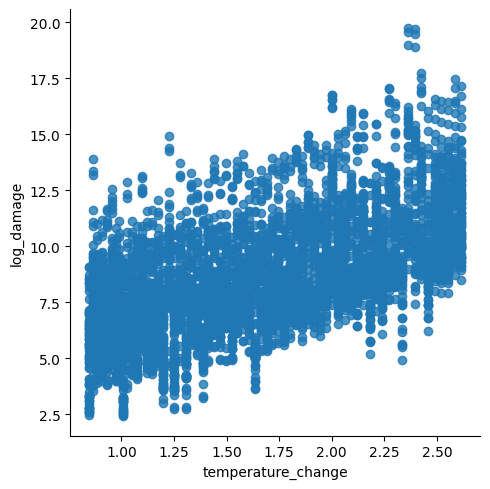

In [206]:
sns.lmplot(x='temperature_change', y='log_damage', data=data_dummy)

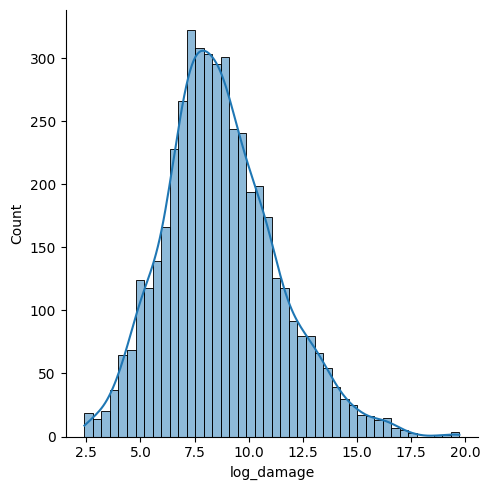

In [207]:
#damage_high = data[data['total_damage'] < 10000]
sns.displot(data, x='log_damage', kde=True)

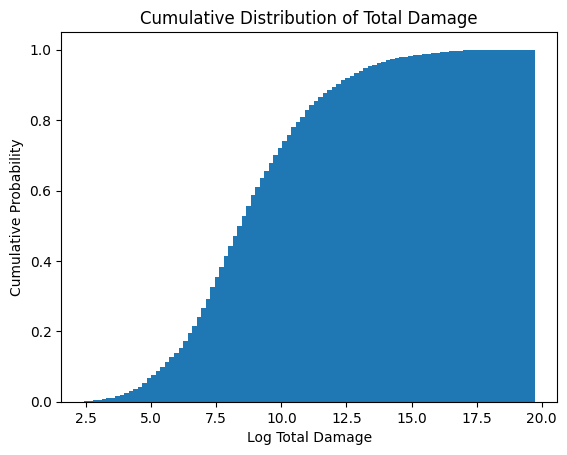

In [208]:
import matplotlib.pyplot as plt

plt.hist(data['log_damage'], bins=100, cumulative=True, density=True)
plt.xlabel('Log Total Damage')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Total Damage')
plt.show()

### Fourth model : what about regions ? 

Let's try by having a dummy by region.

In [209]:
# Regressing
reg_country = sm.OLS(data_dummy['log_damage'], sm.add_constant(data_dummy[['temperature_change', 'log_coef'] + dummy_regions])).fit()
reg_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_damage   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     8186.
Date:                Thu, 12 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:22:05   Log-Likelihood:                -2256.3
No. Observations:                4638   AIC:                             4563.
Df Residuals:                    4613   BIC:                             4724.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.4986      0.034    132.881      0.000       4.432       4.565
temperature_change     3.0885      0.011    277.704      0.000       3.067       3.110
log_coef               0.9953      0.006    179.958      0.000       0.984       1.006
region_BULGARIA       -2.6589      0.040    -66.194      0.000      -2.738      -2.580
region_CHINA           3.6058      0.040     89.802      0.000       3.527       3.685
region_CROATIA        -2.5888      0.040    -64.712      0.000      -2.667      -2.510
region_CYPRUS         -3.6857      0.040    -92.164      0.000      -3.764      -3.607
region_DENMARK        -0.5314      0.040    -13.140      0.000      -0.611      -0.452
region_ESTONIA        -3.1442      0.040    -78.631      0.000      -3.223      -3.066
region_FINLAND        -0.8753      0.040    -21.644      0.000      -0.955      -0.796
region_FRANCE          1.3229      0.040     33.093      0.000       1.244       1.401
region_GERMANY         2.2549      0.041     55.306      0.000       2.175       2.335
region_GREECE         -1.6415      0.040    -41.035      0.000      -1.720      -1.563
region_HUNGARY        -1.8721      0.040    -46.784      0.000      -1.951      -1.794
region_INDIA           0.7267      0.043     16.990      0.000       0.643       0.811
region_IRELAND        -0.8631      0.040    -21.590      0.000      -0.941      -0.785
region_LATVIA         -2.8965      0.035    -83.402      0.000      -2.965      -2.828
region_LITHUANIA      -2.7763      0.040    -69.420      0.000      -2.855      -2.698
region_LUXEMBOURG     -1.9231      0.041    -46.757      0.000      -2.004      -1.842
region_POLAND          0.1459      0.040      3.649      0.000       0.068       0.224
region_PORTUGAL       -1.2950      0.040    -32.386      0.000      -1.373      -1.217
region_RUSSIA          1.2076      0.040     30.196      0.000       1.129       1.286
region_SLOVAKIA       -2.0913      0.040    -52.288      0.000      -2.170      -2.013
region_SPAIN           0.2098      0.040      5.247      0.000       0.131       0.288
region_SWEDEN         -0.1185      0.040     -2.954      0.003      -0.197      -0.040
==============================================================================
Omnibus:                      203.193   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.827
Skew:                           0.530   Prob(JB):                     1.24e-50
Kurtosis:                       3.257   Cond. No.                         48.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Fifth model : putting it all together

Let's now try with both dummy variables for the region and for the equation. 

In [210]:
# Regressing
reg_double = sm.OLS(data_dummy['log_damage'], sm.add_constant(data_dummy[['temperature_change', 'log_coef'] + dummy_equations + dummy_regions])).fit()
reg_double.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_damage   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.132e+04
Date:                Thu, 12 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:22:05   Log-Likelihood:                -1335.5
No. Observations:                4638   AIC:                             2725.
Df Residuals:                    4611   BIC:                             2899.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            4.4417      0.029    155.488      0.000       4.386       4.498
temperature_change                               3.0885      0.009    338.615      0.000       3.071       3.106
log_coef                                         0.9953      0.005    219.430      0.000       0.986       1.004
equation_dice_tot_eq_dice_total_impact          -0.1862      0.012    -15.994      0.000      -0.209      -0.163
equation_witness_tot_eq_witness_total_impact     0.3568      0.012     30.653      0.000       0.334       0.380
region_BULGARIA                                 -2.6589      0.033    -80.713      0.000      -2.723      -2.594
region_CHINA                                     3.6058      0.033    109.499      0.000       3.541       3.670
region_CROATIA                                  -2.5888      0.033    -78.906      0.000      -2.653      -2.524
region_CYPRUS                                   -3.6857      0.033   -112.379      0.000      -3.750      -3.621
region_DENMARK                                  -0.5314      0.033    -16.022      0.000      -0.596      -0.466
region_ESTONIA                                  -3.1442      0.033    -95.878      0.000      -3.209      -3.080
region_FINLAND                                  -0.8753      0.033    -26.392      0.000      -0.940      -0.810
region_FRANCE                                    1.3229      0.033     40.352      0.000       1.259       1.387
region_GERMANY                                   2.2549      0.033     67.437      0.000       2.189       2.320
region_GREECE                                   -1.6415      0.033    -50.035      0.000      -1.706      -1.577
region_HUNGARY                                  -1.8721      0.033    -57.046      0.000      -1.936      -1.808
region_INDIA                                     0.7267      0.035     20.716      0.000       0.658       0.796
region_IRELAND                                  -0.8631      0.033    -26.326      0.000      -0.927      -0.799
region_LATVIA                                   -2.8965      0.028   -101.696      0.000      -2.952      -2.841
region_LITHUANIA                                -2.7763      0.033    -84.647      0.000      -2.841      -2.712
region_LUXEMBOURG                               -1.9231      0.034    -57.012      0.000      -1.989      -1.857
region_POLAND                                    0.1459      0.033      4.450      0.000       0.082       0.210
region_PORTUGAL                                 -1.2950      0.033    -39.490      0.000      -1.359      -1.231
region_RUSSIA                                    1.2076      0.033     36.819      0.000       1.143       1.272
region_SLOVAKIA                 

We check the residuals distribution : they are clearly correlated with the region. 

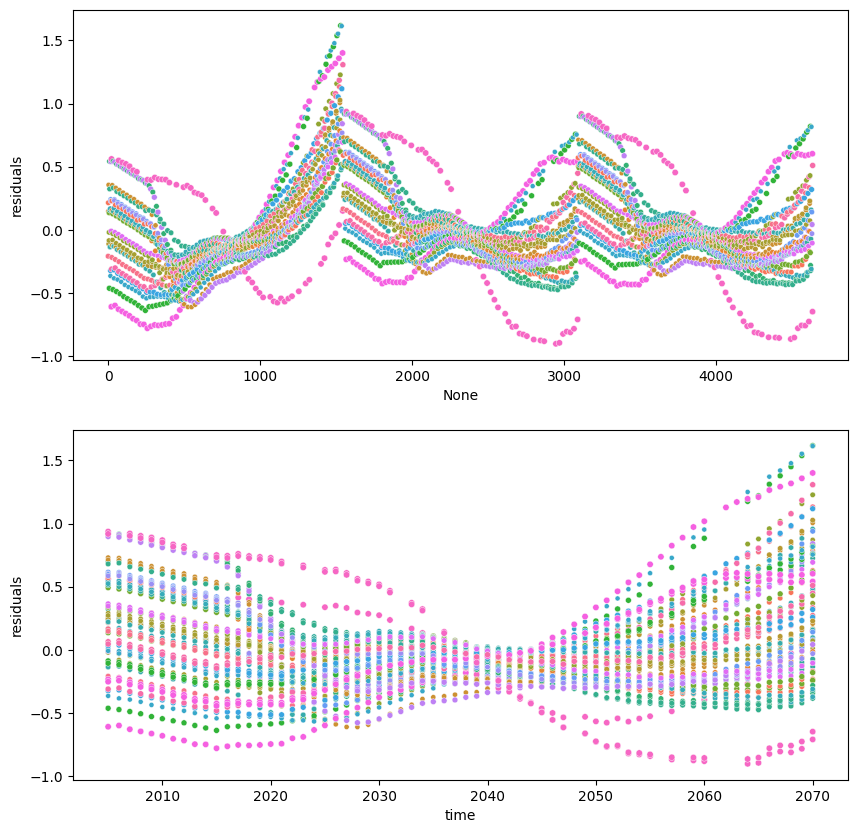

In [211]:
residuals = reg_double.resid

#joint = residuals.join(data_dummy[['temperature_change', 'coef'] + dummy_equations + dummy_regions])
data['residuals'] = residuals

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

sns.scatterplot(data=data, x=data.index, y='residuals', hue='region', s=np.log(data['pop_est']), legend=False, ax=axs[0])
sns.scatterplot(data=data, x='time', y='residuals', hue='region', s=np.log(data['pop_est']), legend=False, ax=axs[1])

#residuals.plot(ax=ax, color='black', alpha=0.5)

plt.show()


In [212]:
bp_test = het_breuschpagan(reg_double.resid, reg_double.model.exog)
white_test = het_white(reg_double.resid, reg_double.model.exog)
white_test[1]

0.0

<Axes: xlabel='None', ylabel='log_damage'>

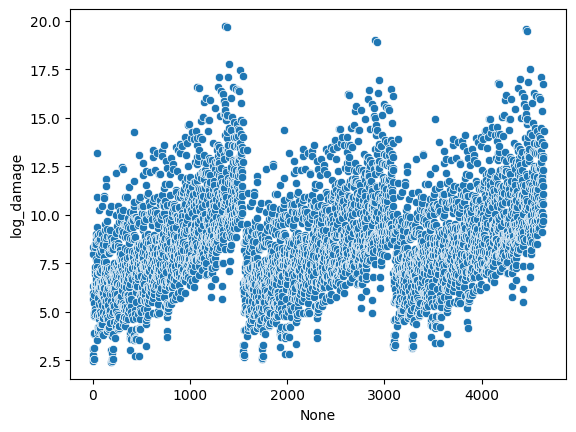

In [213]:
sns.scatterplot(data=data_dummy, x=data_dummy.index, y='log_damage')

In [214]:
robust_model = reg_double.get_robustcov_results()
robust_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_damage   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     9569.
Date:                Thu, 12 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:22:06   Log-Likelihood:                -1335.5
No. Observations:                4638   AIC:                             2725.
Df Residuals:                    4611   BIC:                             2899.
Df Model:                          26                                         
Covariance Type:                  HC1                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            4.4417      0.026    173.371      0.000       4.392       4.492
temperature_change                               3.0885      0.012    256.678      0.000       3.065       3.112
log_coef                                         0.9953      0.005    182.225      0.000       0.985       1.006
equation_dice_tot_eq_dice_total_impact          -0.1862      0.012    -15.124      0.000      -0.210      -0.162
equation_witness_tot_eq_witness_total_impact     0.3568      0.012     29.167      0.000       0.333       0.381
region_BULGARIA                                 -2.6589      0.027   -100.103      0.000      -2.711      -2.607
region_CHINA                                     3.6058      0.040     90.375      0.000       3.528       3.684
region_CROATIA                                  -2.5888      0.025   -102.911      0.000      -2.638      -2.539
region_CYPRUS                                   -3.6857      0.032   -116.010      0.000      -3.748      -3.623
region_DENMARK                                  -0.5314      0.024    -22.106      0.000      -0.579      -0.484
region_ESTONIA                                  -3.1442      0.023   -134.271      0.000      -3.190      -3.098
region_FINLAND                                  -0.8753      0.029    -30.502      0.000      -0.932      -0.819
region_FRANCE                                    1.3229      0.025     53.482      0.000       1.274       1.371
region_GERMANY                                   2.2549      0.037     61.264      0.000       2.183       2.327
region_GREECE                                   -1.6415      0.034    -48.451      0.000      -1.708      -1.575
region_HUNGARY                                  -1.8721      0.030    -62.397      0.000      -1.931      -1.813
region_INDIA                                     0.7267      0.053     13.815      0.000       0.624       0.830
region_IRELAND                                  -0.8631      0.025    -33.955      0.000      -0.913      -0.813
region_LATVIA                                   -2.8965      0.022   -133.357      0.000      -2.939      -2.854
region_LITHUANIA                                -2.7763      0.025   -109.259      0.000      -2.826      -2.726
region_LUXEMBOURG                               -1.9231      0.038    -50.937      0.000      -1.997      -1.849
region_POLAND                                    0.1459      0.027      5.341      0.000       0.092       0.199
region_PORTUGAL                                 -1.2950      0.028    -46.972      0.000      -1.349      -1.241
region_RUSSIA                                    1.2076      0.027     45.006      0.000       1.155       1.260
region_SLOVAKIA                 

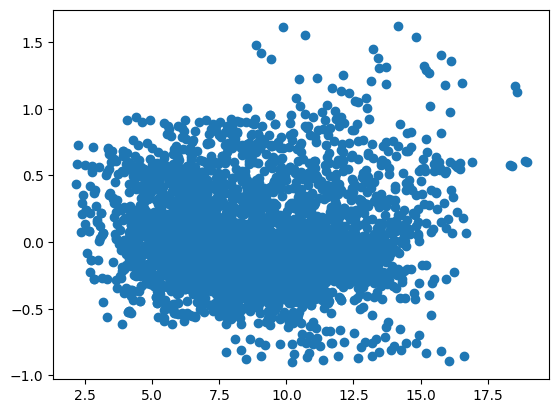

In [215]:
plt.scatter(reg_double.fittedvalues, reg_double.resid)

In [216]:
df_residuals = pd.DataFrame({'Fitted Values': reg_double.fittedvalues, 'Residuals': reg_double.resid})
df_residuals

,Fitted Values,Residuals
0,6.511245,-0.209594
1,2.376565,0.213963
2,2.924228,0.146880
3,2.415497,0.355368
4,6.101360,-0.112222
...,...,...
4633,12.872761,0.041682
4634,12.400471,-0.105634
4635,16.114451,0.602431
4636,14.228474,-0.648746


In [217]:
i = 0 
print(np.linspace((10*i), (10*(i+1)), 6))

[ 0.  2.  4.  6.  8. 10.]


0.0
2.0
4.0
6.0
8.0
10.0
10.0
12.0
14.0
16.0
18.0
20.0


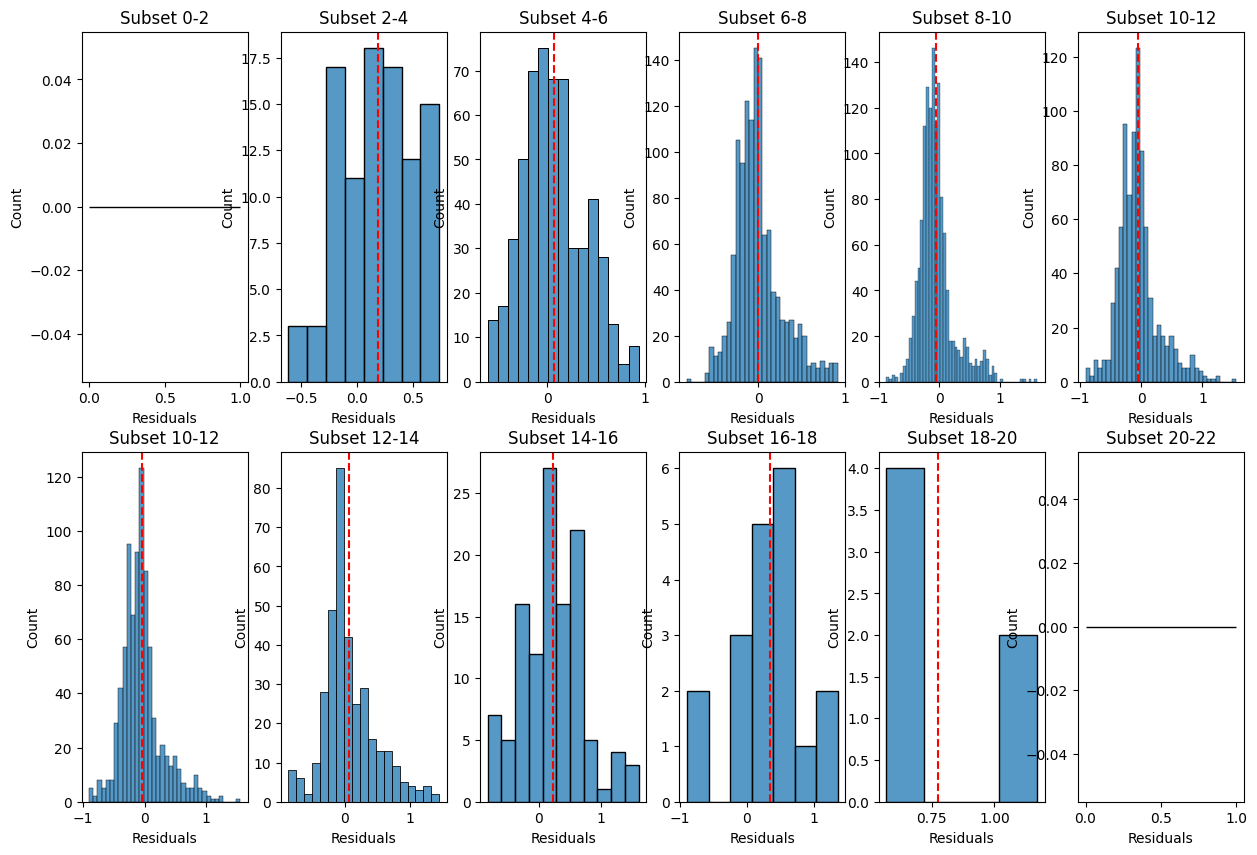

In [218]:
df_residuals = pd.DataFrame({'Fitted Values': reg_double.fittedvalues, 'Residuals': reg_double.resid})

fig, axs = plt.subplots(2, 6, figsize=(15, 10))

for i in range(0, 2, 1): 
    #print(i)
    for j, x in enumerate(np.linspace(10*i, (10*(i+1)), 6)) :
        print(x) 
        subset = df_residuals[(df_residuals['Fitted Values'] > x) & (df_residuals['Fitted Values'] < x + 2)]

        sns.histplot(data=subset, x='Residuals', ax=axs[i, j])
        axs[i, j].set_title(f"Subset {int(x)}-{int(x+2)}")
        axs[i, j].axvline(subset['Residuals'].mean(), color='red', linestyle='--')

fig.savefig('../../../../Memoire/results/slr_4.png', dpi=300)
plt.show()

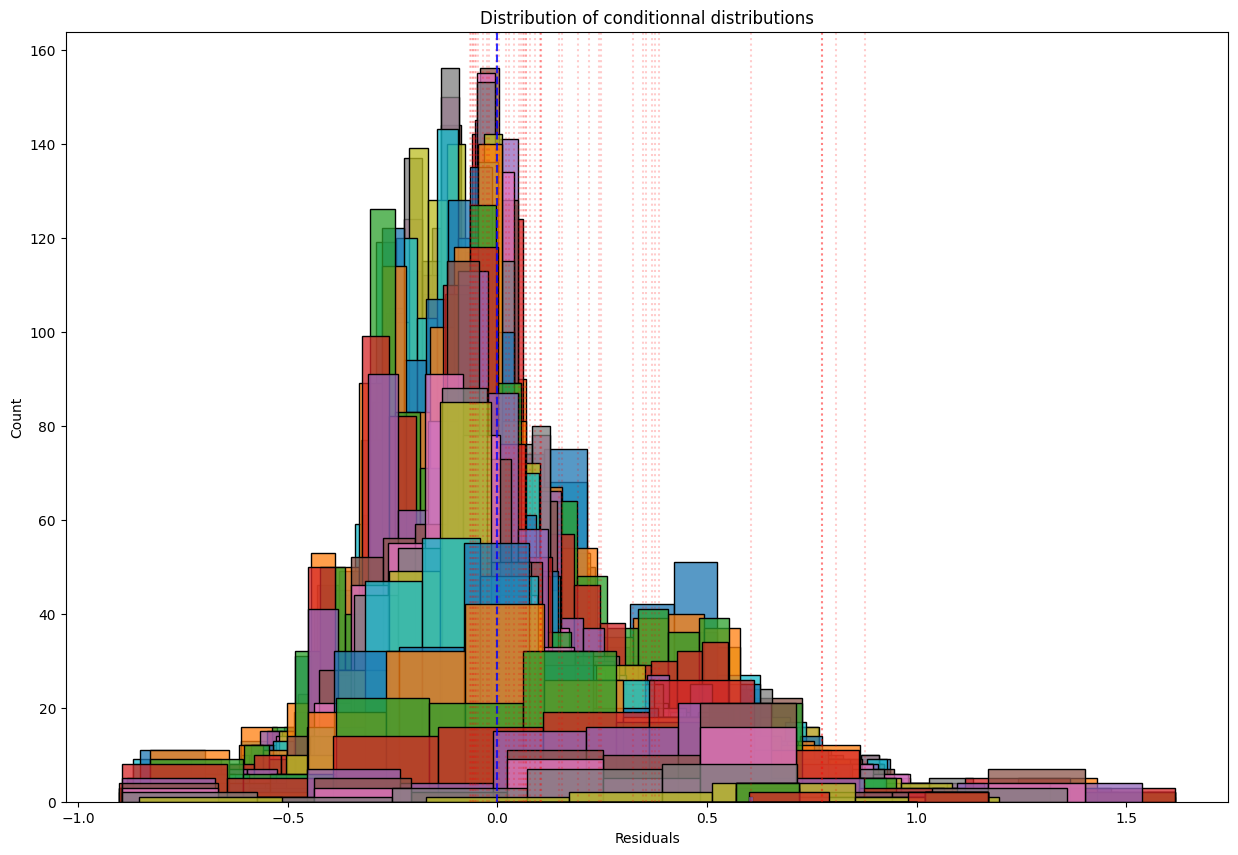

In [219]:
df_residuals = pd.DataFrame({'Fitted Values': reg_double.fittedvalues, 'Residuals': reg_double.resid})

fig, axs = plt.subplots(1, 1, figsize=(15, 10))

for j, x in enumerate(np.linspace(0, 21, 50)) : 
    subset = df_residuals[(df_residuals['Fitted Values'] > x) & (df_residuals['Fitted Values'] < x + 2)]

    sns.histplot(data=subset, x='Residuals', ax=axs)
    axs.axvline(subset['Residuals'].mean(), color='red', linestyle='dotted', alpha=0.2)

axs.set_title(f"Distribution of conditionnal distributions")


axs.axvline(df_residuals['Residuals'].mean(), color='blue', linestyle='--', alpha=0.8)


fig.savefig('../../../../Memoire/results/slr_4_2.png', dpi=300)
plt.show()

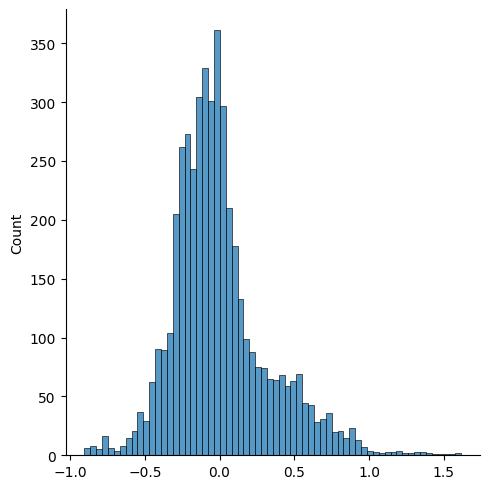

In [220]:
sns.displot(reg_double.resid)

To the table.

### Summary table

In [221]:
# Creating the stargazer object
stargazer = Stargazer([reg_temp, reg_simple, reg_equation, reg_country, reg_double])

# Customizing the table
#stargazer.title('Résultats de la régression')
stargazer.show_model_numbers(True)
stargazer.cov_spacing = 2

# Showing everthing except countries
variables_to_show = ['temperature_change', 'log_coef'] + dummy_equations
stargazer.covariate_order(variables_to_show)

# Customizing the columns and lines titles
stargazer.custom_columns(['Temp', 'Simple', 'Equation', 'Country', 'Double'], [1, 1, 1, 1, 1])
stargazer.rename_covariates({'temperature_change': 'Temperature Change',
                              'coef': 'Ethical coefficient', 
                              'equation': 'Model',
                              'region': 'Region', 
                              'equation_dice_tot_eq_dice_total_impact': 'DICE form damage function',
                              'equation_witness_tot_eq_witness_total_impact': 'WITNESS form damage function',})


stargazer.add_line('Regional dummy', ['No', 'No', 'No', 'Yes', 'Yes'])



#stargazer.add_custom_notes(['This is a note'])

# Rendering to latex to include in the report
latex_code=stargazer.render_latex()
latex_code = latex_code.replace('_', r'\_')

# Saving it to the report folder
with open('../../../../Memoire/results/regression_1.tex', 'w') as f:
    f.write(latex_code)

# Showing the table
stargazer


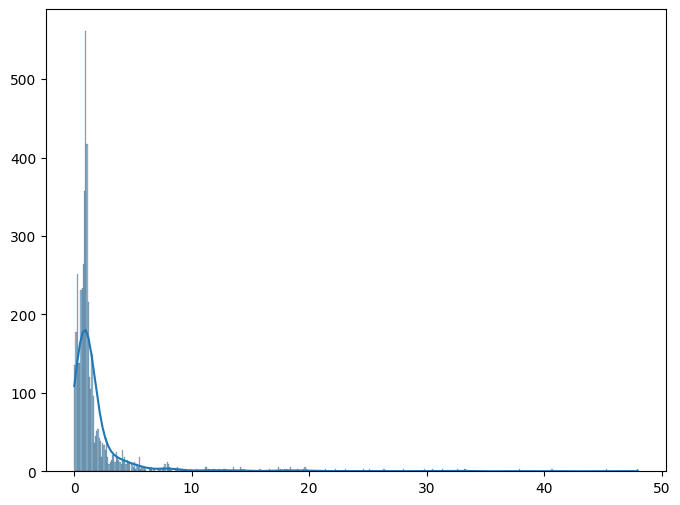

In [222]:
import matplotlib.pyplot as plt

# Créer une figure
fig, ax = plt.subplots(figsize=(8, 6))


sns.histplot(data=data, x='coef', kde=True, ax=ax)

# Remove the x-label and y-label
ax.set_xlabel('')
ax.set_ylabel('')

# Enregistrer la figure
fig.savefig('../../../../Memoire/results/coef.png', dpi=300)

## Regressions at the global level

In [223]:
damage_aggregated = pd.read_csv('damage_aggregated.csv')
damage_aggregated.head()

,time,equation,damage,gross_domestic_product_nominal,total_radiative_forcing,temperature_change,exponent,constant,equation_dice_tot_eq_dice_total_impact,equation_witness_tot_eq_witness_total_impact,log_exponent,log_damage,log_constant
0,2005.0,define_tot_eq_define_total_impact,5.929256e+04,7.153753e+07,1.714491,0.84500,0.845784,47058.691018,False,False,-0.167491,10.990239,10.759151
1,2005.0,dice_tot_eq_dice_total_impact,7.162551e+04,7.153753e+07,1.714491,0.84500,0.845784,47058.691018,True,False,-0.167491,11.179207,10.759151
2,2005.0,witness_tot_eq_witness_total_impact,1.210243e+05,7.153753e+07,1.714491,0.84500,0.845784,47058.691018,False,True,-0.167491,11.703747,10.759151
3,2006.0,define_tot_eq_define_total_impact,1.063262e+06,6.011960e+07,1.771211,0.86417,-2.057845,27579.330636,False,False,NaN,13.876852,10.224822
4,2006.0,dice_tot_eq_dice_total_impact,1.282744e+06,6.011960e+07,1.771211,0.86417,-2.057845,27579.330636,True,False,NaN,14.064512,10.224822


In [224]:
equation_columns = [col for col in damage_aggregated.columns if 'equation_' in col]
damage_aggregated[equation_columns] = damage_aggregated[equation_columns].astype('int')
equation_columns

['equation_dice_tot_eq_dice_total_impact',
 'equation_witness_tot_eq_witness_total_impact']

In [225]:
# Replace inf values with nan
damage_aggregated.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with nan values
damage_aggregated.dropna(inplace=True)

# Display the cleaned DataFrame
damage_aggregated.head()

,time,equation,damage,gross_domestic_product_nominal,total_radiative_forcing,temperature_change,exponent,constant,equation_dice_tot_eq_dice_total_impact,equation_witness_tot_eq_witness_total_impact,log_exponent,log_damage,log_constant
0,2005.0,define_tot_eq_define_total_impact,59292.558712,7.153753e+07,1.714491,0.845000,0.845784,47058.691018,0,0,-0.167491,10.990239,10.759151
1,2005.0,dice_tot_eq_dice_total_impact,71625.514306,7.153753e+07,1.714491,0.845000,0.845784,47058.691018,1,0,-0.167491,11.179207,10.759151
2,2005.0,witness_tot_eq_witness_total_impact,121024.310448,7.153753e+07,1.714491,0.845000,0.845784,47058.691018,0,1,-0.167491,11.703747,10.759151
18,2011.0,define_tot_eq_define_total_impact,185307.705816,7.153753e+07,1.918807,0.973186,0.224264,16786.686466,0,0,-1.494932,12.129773,9.728341
19,2011.0,dice_tot_eq_dice_total_impact,221362.746920,7.153753e+07,1.918807,0.973186,0.224264,16786.686466,1,0,-1.494932,12.307558,9.728341


### Regressing only with temperature change

In [226]:
reg_global_temp = sm.OLS(damage_aggregated['log_damage'], sm.add_constant(damage_aggregated[['temperature_change']])).fit()
reg_global_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_damage   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     731.5
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.08e-41
Time:                        15:22:11   Log-Likelihood:                -91.358
No. Observations:                  81   AIC:                             186.7
Df Residuals:                      79   BIC:                             191.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.3775      0.301     24.488      0.000       6.778       7.977
temperature_change     4.4871      0.166     27.046      0.000       4.157       4.817
==============================================================================
Omnibus:                        7.967   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.762
Skew:                           0.749   Prob(JB):                       0.0206
Kurtosis:                       3.236   Cond. No.                         8.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regressing with multiple parameters

In [227]:
reg_global_coef = sm.OLS(damage_aggregated['log_damage'], sm.add_constant(damage_aggregated[['temperature_change', 'exponent', 'constant']])).fit()
reg_global_coef.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_damage   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     648.5
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.56e-54
Time:                        15:22:11   Log-Likelihood:                -53.282
No. Observations:                  81   AIC:                             114.6
Df Residuals:                      77   BIC:                             124.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.7065      0.217     35.566      0.000       7.275       8.138
temperature_change     4.6273      0.108     42.673      0.000       4.411       4.843
exponent               0.8954      0.110      8.125      0.000       0.676       1.115
constant           -3.688e-05   4.29e-06     -8.606      0.000   -4.54e-05   -2.83e-05
==============================================================================
Omnibus:                        1.381   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.289
Skew:                           0.174   Prob(JB):                        0.525
Kurtosis:                       2.490   Cond. No.                     1.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Adding the equation dummies

In [228]:
reg_global_eq = sm.OLS(damage_aggregated['log_damage'], sm.add_constant(damage_aggregated[['temperature_change', 'exponent', 'constant'] + equation_columns])).fit()
reg_global_eq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_damage   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     495.6
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           6.18e-56
Time:                        15:22:11   Log-Likelihood:                -42.788
No. Observations:                  81   AIC:                             97.58
Df Residuals:                      75   BIC:                             111.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            7.6827      0.204     37.627      0.000       7.276       8.089
temperature_change                               4.6273      0.097     47.941      0.000       4.435       4.820
exponent                                         0.8954      0.098      9.128      0.000       0.700       1.091
constant                                     -3.688e-05   3.82e-06     -9.668      0.000   -4.45e-05   -2.93e-05
equation_dice_tot_eq_dice_total_impact          -0.2370      0.116     -2.041      0.045      -0.468      -0.006
equation_witness_tot_eq_witness_total_impact     0.3082      0.116      2.655      0.010       0.077       0.539
==============================================================================
Omnibus:                        1.375   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                1.430
Skew:                           0.266   Prob(JB):                        0.489
Kurtosis:                       2.624   Cond. No.                     1.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### With explanatory variables logged

In [229]:
reg_global_eq_log = sm.OLS(damage_aggregated['log_damage'], sm.add_constant(damage_aggregated[['temperature_change', 'log_exponent', 'log_constant'] + equation_columns])).fit()
reg_global_eq_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_damage   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     441.1
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           4.24e-54
Time:                        15:22:11   Log-Likelihood:                -47.360
No. Observations:                  81   AIC:                             106.7
Df Residuals:                      75   BIC:                             121.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           18.1232      1.118     16.205      0.000      15.895      20.351
temperature_change                               4.7563      0.102     46.460      0.000       4.552       4.960
log_exponent                                     0.4087      0.055      7.468      0.000       0.300       0.518
log_constant                                    -1.0645      0.111     -9.612      0.000      -1.285      -0.844
equation_dice_tot_eq_dice_total_impact          -0.2370      0.123     -1.929      0.057      -0.482       0.008
equation_witness_tot_eq_witness_total_impact     0.3082      0.123      2.509      0.014       0.064       0.553
==============================================================================
Omnibus:                       15.481   Durbin-Watson:                   0.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.493
Skew:                           1.017   Prob(JB):                     0.000159
Kurtosis:                       4.024   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
print(reg_global_eq_log.model.exog_names)

['const', 'temperature_change', 'log_exponent', 'log_constant', 'equation_dice_tot_eq_dice_total_impact', 'equation_witness_tot_eq_witness_total_impact']


### Summary table

In [231]:
# Creating the stargazer object
stargazer = Stargazer([reg_global_temp, reg_global_coef, reg_global_eq, reg_global_eq_log])

# Customizing the table
#stargazer.title('Résultats de la régression')
stargazer.show_model_numbers(True)
stargazer.cov_spacing = 2

# Showing everthing except countries
variables_to_show = ['temperature_change', 'exponent', 'constant', 'log_exponent', 'log_constant'] + equation_columns
stargazer.covariate_order(variables_to_show)

# Customizing the columns and lines titles
stargazer.custom_columns(['Temp', 'Simple', 'Equation', 'Logged'], [1, 1, 1, 1])
stargazer.rename_covariates({'temperature_change': 'Temperature Change',
                              'constant': 'Constant', 
                              'exponent' : 'Exponent', 
                              'equation_dice_tot_eq_dice_total_impact': 'DICE form damage function',
                              'equation_witness_tot_eq_witness_total_impact': 'WITNESS form damage function',})


#stargazer.add_line('Regional dummy', ['No', 'No', 'No', 'Yes', 'Yes'])



#stargazer.add_custom_notes(['This is a note'])

# Rendering to latex to include in the report
latex_code=stargazer.render_latex()
latex_code = latex_code.replace('_', r'\_')

# Saving it to the report folder
with open('../../../../Memoire/results/regression_global.tex', 'w') as f:
    f.write(latex_code)

# Showing the table
stargazer


In [232]:
reg_global_eq_log.model.exog_names

['const',
 'temperature_change',
 'log_exponent',
 'log_constant',
 'equation_dice_tot_eq_dice_total_impact',
 'equation_witness_tot_eq_witness_total_impact']

In [233]:
X_pred_const = sm.add_constant(X_pred, has_constant='add')
X_pred_const

,const,const,temperature_change,log_exponent,log_constant,equation_dice_tot_eq_dice_total_impact,equation_witness_tot_eq_witness_total_impact
0,1.0,1.0,1.743777,-3.028726,10.300637,0.333333,0.333333
1,1.0,1.0,1.743777,-2.990587,10.300637,0.333333,0.333333
2,1.0,1.0,1.743777,-2.952447,10.300637,0.333333,0.333333
3,1.0,1.0,1.743777,-2.914307,10.300637,0.333333,0.333333
4,1.0,1.0,1.743777,-2.876167,10.300637,0.333333,0.333333
...,...,...,...,...,...,...,...
95,1.0,1.0,1.743777,0.594550,10.300637,0.333333,0.333333
96,1.0,1.0,1.743777,0.632690,10.300637,0.333333,0.333333
97,1.0,1.0,1.743777,0.670830,10.300637,0.333333,0.333333
98,1.0,1.0,1.743777,0.708970,10.300637,0.333333,0.333333


### Visualising the effect of the exponent on the level of damage

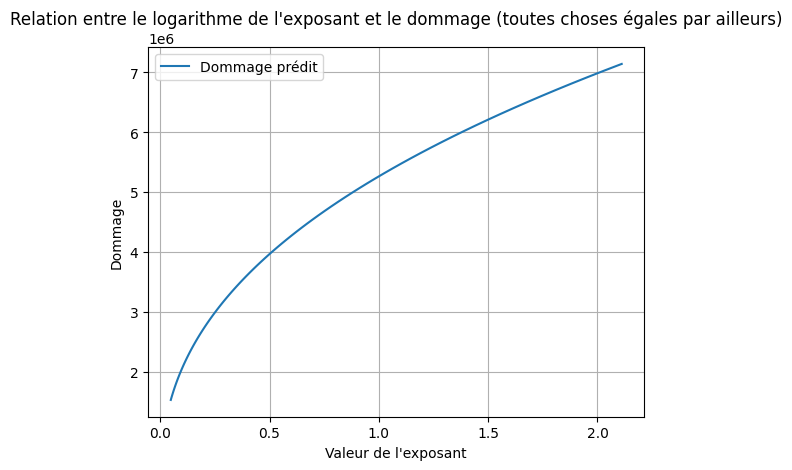

In [234]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plage de valeurs pour log_exponent (car ton modèle utilise le log de l'exposant)
log_exponent_range = np.linspace(damage_aggregated['log_exponent'].min(), 
                                 damage_aggregated['log_exponent'].max(), 100)

# Fixer les autres variables à leurs moyennes (ou à d'autres valeurs pertinentes)
mean_temperature = damage_aggregated['temperature_change'].mean()
mean_log_constant = damage_aggregated['log_constant'].mean()
mean_dice = damage_aggregated['equation_dice_tot_eq_dice_total_impact'].mean()
mean_witness = damage_aggregated['equation_witness_tot_eq_witness_total_impact'].mean()

# Générer les prédictions avec les variables log-transformées
X_pred = pd.DataFrame({
    'temperature_change': [mean_temperature] * len(log_exponent_range),
    'log_exponent': log_exponent_range,  # Utiliser log_exponent au lieu de exponent
    'log_constant': [mean_log_constant] * len(log_exponent_range),  # Utiliser log_constant
    'equation_dice_tot_eq_dice_total_impact': [mean_dice] * len(log_exponent_range),
    'equation_witness_tot_eq_witness_total_impact': [mean_witness] * len(log_exponent_range)
})

# Ajouter la constante pour le modèle
X_pred = sm.add_constant(X_pred, has_constant='add')

# Prédire les dommages log-transformés
y_pred_log = reg_global_eq_log.predict(X_pred)

# Convertir les prédictions log en dommages réels
y_pred = np.exp(y_pred_log)

exponent_range = np.exp(log_exponent_range)

# Tracer la courbe
plt.plot(exponent_range, y_pred, label='Dommage prédit')
plt.xlabel('Valeur de l\'exposant')
plt.ylabel('Dommage')
plt.title('Relation entre le logarithme de l\'exposant et le dommage (toutes choses égales par ailleurs)')
plt.grid(True)
plt.legend()
plt.show()



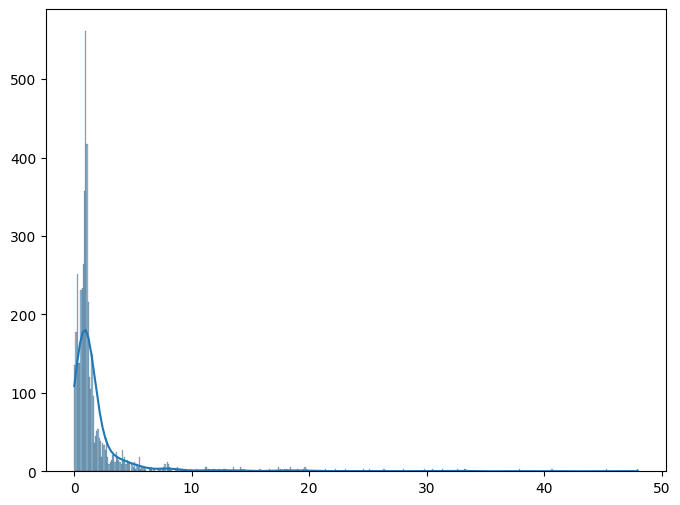

In [235]:
import matplotlib.pyplot as plt

# Créer une figure
fig, ax = plt.subplots(figsize=(8, 6))


sns.histplot(data=data, x='coef', kde=True, ax=ax)

# Remove the x-label and y-label
ax.set_xlabel('')
ax.set_ylabel('')

# Enregistrer la figure
fig.savefig('../../../../Memoire/results/coef.png', dpi=300)

## TO CLEAN : previous text

### Explaining each region x time value by the choice of the model, temperature and the choice of the coefficient

Here, we test a very straight-forward model that explains the level of damage by a few straight-forward variables : 

$$

\text{Damage}_{t,r} = \beta_0 + \beta_1 \cdot GDP_{t,r} + \beta_2 \cdot \text{Temperature change} + \beta_3 \cdot coef_{t,r}
 
$$

By trials and mistake, we have come to the conclusion that using log_damage was a better use. In fact, it appears that this is just re-writting the same equation differently. 

$$

\begin{align*}
& D_{t,r} = f(\text{temperature}, \text{other drivers})_{t,r} \cdot GDP_{t,r} \cdot (\frac{y_{t,r}}{y_0})^\alpha \\
\iff  & D_{t,r} = \text{temperature}_{t,r}^{\beta_1} \cdot GDP_{t,r}^{\beta_2} \cdot \text{coef}^{\beta_3} \\
\iff & log(D_{t,r}) = log(\text{temperature}_{t,r}^{\beta_1} \cdot GDP_{t,r}^{\beta_2} \cdot \text{coef}^{\beta_3}) \\
\iff & log(D_{t,r}) = \beta_1 \cdot log(\text{temperature}_{t,r}) + \beta_2 \cdot log(GDP_{t,r}) + \beta_3 \cdot log(\text{coef})
\end{align*}

$$


In [236]:
regression_simple = sm.OLS(data['log_damage'], sm.add_constant(data[['log_temperature_change', 'log_coef', 'log_gross_domestic_product_nominal']])).fit()
regression_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_damage   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.241e+05
Date:                Thu, 12 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:22:13   Log-Likelihood:                -810.12
No. Observations:                4638   AIC:                             1628.
Df Residuals:                    4634   BIC:                             1654.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -5.6428      0.028   -199.045      0.000      -5.698      -5.587
log_temperature_change                 2.3518      0.014    169.078      0.000       2.325       2.379
log_coef                               0.9980      0.004    248.708      0.000       0.990       1.006
log_gross_domestic_product_nominal     1.0047      0.002    444.046      0.000       1.000       1.009
==============================================================================
Omnibus:                    21760.595   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              401.878
Skew:                           0.299   Prob(JB):                     5.41e-88
Kurtosis:                       1.688   Cond. No.                         90.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We find a R-squared coefficient of 0.990, which means that the variables we take into account explain 99% of the variability of the level of climate damage. This is consistent with the way the climate damages have been designed : they are precisely a combination of temperature, GDP and the coef. We have linearized the function, which was a product, by passing it through the log function. 

In [237]:
data['damage'].corr(data['coef'])

0.21746594782644174

<Axes: xlabel='log_gross_domestic_product_nominal', ylabel='log_damage'>

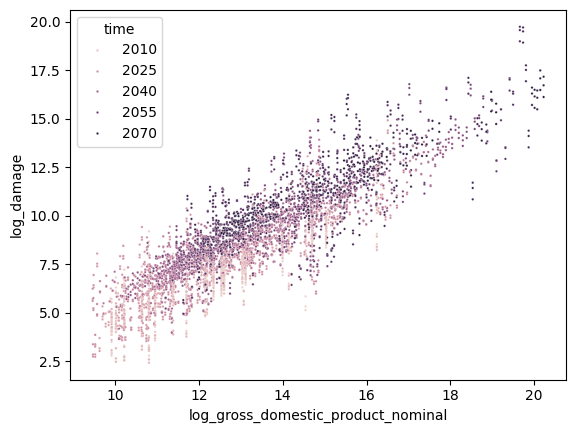

In [238]:
sns.scatterplot(data=data, x='log_gross_domestic_product_nominal', y='log_damage', hue='time', s=3)

### As aggregated data by country

Now, the thing we are being interested in is the global level of damage. Indeed, that is the metric used by SCC specialists to compute the optimal level of carbon emissions and the associated Social Cost of Carbon. 

We'll use the same dataset and sum the damages by year for every region, in order to have a global level of damage for every year. These levels of damage will be differentiated by their coef, the temperature change associated with it. 

We will then compute the following model : 

$$

\text{Global damage} = \beta_0 + \beta_1 \cdot \text{temperature change} + \beta_2 \cdot \text{coef}

$$

In [239]:
data_global = data.groupby(['time', 'equation', 'coef', 'temperature_change']).agg({'damage':'sum', 'gross_domestic_product_nominal': 'sum'}).reset_index()
data_global = pd.get_dummies(data_global, columns=['equation'])
data_global["decade"] = (data_global["time"] // 10 *10)

data_global

,time,coef,temperature_change,damage,gross_domestic_product_nominal,equation_define_tot_eq_define_total_impact,equation_dice_tot_eq_dice_total_impact,equation_witness_tot_eq_witness_total_impact,decade
0,2005.0,0.039563,0.845000,168.127495,2.073712e+06,True,False,False,2000.0
1,2005.0,0.131897,0.845000,13.336815,4.934207e+04,True,False,False,2000.0
2,2005.0,0.180451,0.845000,4202.244499,1.136377e+07,True,False,False,2000.0
3,2005.0,0.192070,0.845000,547.741449,1.391604e+06,True,False,False,2000.0
4,2005.0,0.192222,0.845000,47.524803,1.206474e+05,True,False,False,2000.0
...,...,...,...,...,...,...,...,...,...
4435,2070.0,0.877159,2.616576,15715.641407,4.123255e+05,False,False,True,2070.0
4436,2070.0,0.929973,2.616576,53317.118056,1.319419e+06,False,False,True,2070.0
4437,2070.0,0.969120,2.616576,22459.730593,5.333512e+05,False,False,True,2070.0
4438,2070.0,0.975361,2.616576,42596.603789,1.005070e+06,False,False,True,2070.0


In [240]:

data_global["decade"] = (data_global["time"] // 10 *10)

y =  np.log(data_global['damage'])
X = data_global[['coef' , 'equation_define_tot_eq_define_total_impact',  'equation_witness_tot_eq_witness_total_impact']]

X = X.astype(float)



regression_global = sm.OLS(y, sm.add_constant(X)).fit() 
regression_global.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 damage   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     161.3
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           3.10e-99
Time:                        15:22:13   Log-Likelihood:                -10274.
No. Observations:                4440   AIC:                         2.056e+04
Df Residuals:                    4436   BIC:                         2.058e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            8.2040      0.066    123.876      0.000       8.074       8.334
coef                                             0.1907      0.009     21.126      0.000       0.173       0.208
equation_define_tot_eq_define_total_impact       0.1859      0.090      2.065      0.039       0.009       0.362
equation_witness_tot_eq_witness_total_impact     0.5430      0.090      6.033      0.000       0.367       0.719
==============================================================================
Omnibus:                      112.459   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.076
Skew:                           0.388   Prob(JB):                     5.11e-27
Kurtosis:                       3.229   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Same taking into account the time : higher R squared, but strong collinearity. 

In [241]:
y =  np.log(data_global['damage'])
X = data_global[['time', 'coef' , 'equation_define_tot_eq_define_total_impact',  'equation_witness_tot_eq_witness_total_impact']]

X = X.astype(float)



regression_global = sm.OLS(y, sm.add_constant(X)).fit() 
regression_global.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 damage   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     885.5
Date:                Thu, 12 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:22:13   Log-Likelihood:                -9200.7
No. Observations:                4440   AIC:                         1.841e+04
Df Residuals:                    4435   BIC:                         1.844e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         -154.4807      3.098    -49.857      0.000    -160.555    -148.406
time                                             0.0799      0.002     52.512      0.000       0.077       0.083
coef                                             0.1982      0.007     27.947      0.000       0.184       0.212
equation_define_tot_eq_define_total_impact       0.1859      0.071      2.629      0.009       0.047       0.324
equation_witness_tot_eq_witness_total_impact     0.5430      0.071      7.682      0.000       0.404       0.682
==============================================================================
Omnibus:                      144.281   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.928
Skew:                           0.460   Prob(JB):                     5.09e-35
Kurtosis:                       3.091   Cond. No.                     2.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='coef', ylabel='damage'>

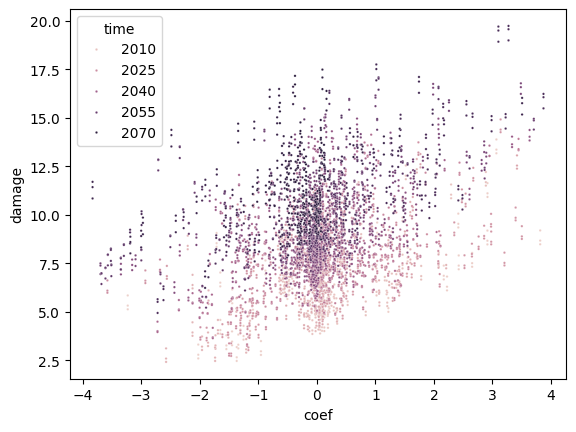

In [242]:
sns.scatterplot(data=data_global, x=np.log(data_global['coef']), y=np.log(data_global['damage']), s=3, hue='time')

<Axes: xlabel='time', ylabel='damage'>

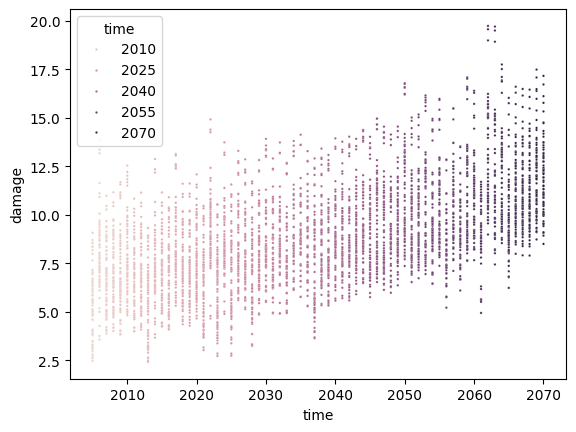

In [243]:
sns.scatterplot(data= data_global, x='time',  y=np.log(data_global['damage']), s=3, hue='time')

### Without the equation dummies

In [244]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
#df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=False)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['damage']
X = df_regression.drop(columns=['damage', 'REGIONS 35 I', 'equation', 'coef'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 damage   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     63.65
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.76e-46
Time:                        15:22:14   Log-Likelihood:                -3717.3
No. Observations:                 198   AIC:                             7451.
Df Residuals:                     190   BIC:                             7477.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 3.679e+09   1.14e+10      0.323      0.747   -1.88e+10    2.62e+10
time                                 -1.851e+06   5.79e+06     -0.320      0.750   -1.33e+07    9.57e+06
extra_extra_exponent                  2.175e+07   2.93e+06      7.433      0.000     1.6e+07    2.75e+07
extra_extra_normalisation_constant    -342.2954    231.178     -1.481      0.140    -798.301     113.711
total_radiative_forcing               1.014e+08   1.23e+08      0.822      0.412   -1.42e+08    3.45e+08
temperature_change                   -5.229e+06   8.76e+05     -5.971      0.000   -6.96e+06    -3.5e+06
gross_domestic_product_nominal           0.4985      0.057      8.725      0.000       0.386       0.611
average_disposable_income_per_capita   -56.4282      7.403     -7.623      0.000     -71.030     -41.826
==============================================================================
Omnibus:                      102.227   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1531.108
Skew:                           1.539   Prob(JB):                         0.00
Kurtosis:                      16.271   Cond. No.                     2.14e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

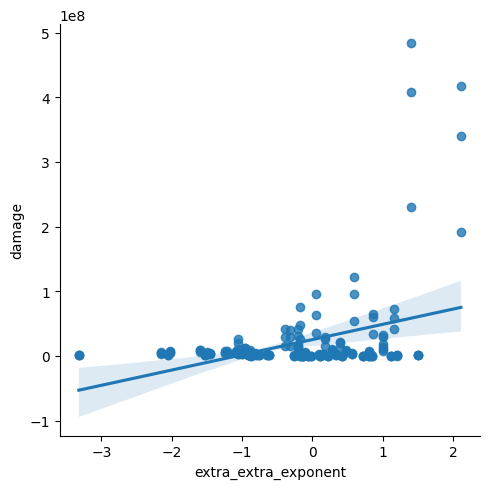

In [245]:
sns.lmplot(data=df_regression, x='extra_extra_exponent', y='damage')

### Without countries as dummy

In [246]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=True)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['damage']
X = df_regression.drop(columns=['damage', 'REGIONS 35 I', 'time', 'extra_extra_normalisation_constant', 'extra_extra_exponent', 'gross_domestic_product_nominal', 'average_disposable_income_per_capita', 'temperature_change'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 damage   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     21.99
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           5.70e-15
Time:                        15:22:15   Log-Likelihood:                -3799.6
No. Observations:                 198   AIC:                             7609.
Df Residuals:                     193   BIC:                             7626.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                        -9.123e+07   1.55e+07     -5.883      0.000   -1.22e+08   -6.06e+07
total_radiative_forcing                       2.855e+07   4.13e+06      6.906      0.000    2.04e+07    3.67e+07
coef                                          4.339e+05   6.56e+04      6.614      0.000    3.05e+05    5.63e+05
equation_dice_tot_eq_dice_total_impact       -1.303e+07   9.21e+06     -1.415      0.159   -3.12e+07    5.13e+06
equation_witness_tot_eq_witness_total_impact -3.264e+06   9.21e+06     -0.355      0.723   -2.14e+07    1.49e+07
==============================================================================
Omnibus:                      203.854   Durbin-Watson:                   0.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4805.115
Skew:                           4.083   Prob(JB):                         0.00
Kurtosis:                      25.710   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
# Creating the stargazer object
stargazer = Stargazer([results])

# Customizing the table
stargazer.title('Résultats de la régression')
stargazer.show_model_numbers(False)

latex_code=stargazer.render_latex()

latex_code = latex_code.replace('_', r'\_')


with open('../../../../Memoire/results/reg.tex', 'w') as f:
    f.write(latex_code)


In [248]:
df_regression

,time,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,REGIONS 35 I,coef,temperature_change,gross_domestic_product_nominal,average_disposable_income_per_capita,damage,equation_dice_tot_eq_dice_total_impact,equation_witness_tot_eq_witness_total_impact
0,2005.0,0.845784,47058.691018,1.714491,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,11.232428,24.505000,7.153753e+07,4.619347e+05,5.929256e+04,False,False
1,2005.0,0.845784,47058.691018,1.714491,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,11.232428,24.505000,7.153753e+07,4.619347e+05,7.162551e+04,True,False
2,2005.0,0.845784,47058.691018,1.714491,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,11.232428,24.505000,7.153753e+07,4.619347e+05,1.210243e+05,False,True
3,2006.0,-2.057845,27579.330636,1.771211,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,233.252268,23.332586,6.011960e+07,4.582531e+05,1.063262e+06,False,False
4,2006.0,-2.057845,27579.330636,1.771211,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,233.252268,23.332586,6.011960e+07,4.582531e+05,1.282744e+06,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
193,2069.0,0.048377,47394.016848,4.763925,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,30.683846,74.955826,1.382135e+09,1.028025e+07,3.502939e+07,True,False
194,2069.0,0.048377,47394.016848,4.763925,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,30.683846,74.955826,1.382135e+09,1.028025e+07,6.384389e+07,False,True
195,2070.0,-0.173258,42595.512443,4.815545,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,24.123357,75.880697,1.528983e+09,1.149219e+07,7.498757e+07,False,False
196,2070.0,-0.173258,42595.512443,4.815545,BELGIUMBULGARIACROATIACYPRUSCZECH REPUBLICDENM...,24.123357,75.880697,1.528983e+09,1.149219e+07,2.634244e+07,True,False


### With countries as dummy

In [249]:
# Group by time, region, and equation, and sum the total damage (aggregated data)
df_regression = df_melted.groupby(['time', 'REGIONS 35 I', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing', 'equation']).sum().reset_index()

# Create a dummy for each damage function
df_regression = pd.get_dummies(df_regression, columns=['equation', 'REGIONS 35 I'], drop_first=True)

# Drop the null values
df_regression.replace([np.inf, -np.inf], np.nan, inplace=True)
df_regression = df_regression.dropna()

# Define the dependant variable and the independant variables
y = df_regression['damage']
X = df_regression.drop(columns=['damage'], axis=1)

# Add a constant to the independant variables
X = sm.add_constant(X)

# Convert the data to float
X = X.astype(float)
y = y.astype(float)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 damage   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     41.10
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          2.97e-265
Time:                        15:22:15   Log-Likelihood:                -97300.
No. Observations:                5595   AIC:                         1.947e+05
Df Residuals:                    5556   BIC:                         1.949e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         1.773e+08   4.49e+08      0.395      0.693   -7.03e+08    1.06e+09
time                                         -9.019e+04   2.28e+05     -0.395      0.693   -5.37e+05    3.57e+05
extra_extra_exponent                          1.085e+06   1.26e+05      8.627      0.000    8.38e+05    1.33e+06
extra_extra_normalisation_constant             -10.8982     10.401     -1.048      0.295     -31.288       9.492
total_radiative_forcing                       2.847e+06   7.12e+06      0.400      0.689   -1.11e+07    1.68e+07
coef                                          5.494e+05   3.01e+04     18.254      0.000     4.9e+05    6.08e+05
temperature_change                           -1.644e+06    7.3e+06     -0.225      0.822    -1.6e+07    1.27e+07
gross_domestic_product_nominal                   0.1027      0.004     26.960      0.000       0.095       0.110
average_disposable_income_per_capita            -2.9542      0.878     -3.363      0.001      -4.676      -1.232
equation_dice_tot_eq_dice_total_impact       -4.612e+05   2.84e+05     -1.625      0.104   -1.02e+06    9.52e+04
equation_witness_tot_eq_witness_total_impact -1.155e+05   2.84e+05     -0.407      0.684   -6.72e+05    4.41e+05
REGIONS 35 I_BULGARIA                        -7.268e+05   8.87e+05     -0.819      0.413   -2.47e+06    1.01e+06
REGIONS 35 I_CHINA                           -7.519e+05   9.89e+05     -0.760      0.447   -2.69e+06    1.19e+06
REGIONS 35 I_CROATIA                         -2.853e+05   8.82e+05     -0.323      0.746   -2.02e+06    1.44e+06
REGIONS 35 I_CYPRUS                          -1.341e+05   8.81e+05     -0.152      0.879   -1.86e+06    1.59e+06
REGIONS 35 I_CZECH REPUBLIC                   1.774e+04   8.81e+05      0.020      0.984   -1.71e+06    1.74e+06
REGIONS 35 I_DENMARK                          3.797e+05   8.88e+05      0.427      0.669   -1.36e+06    2.12e+06
REGIONS 35 I_EASOC                           -3.072e+06   8.99e+05     -3.416      0.001   -4.83e+06   -1.31e+06
REGIONS 35 I_ESTONIA                          4422.7842   8.81e+05      0.005      0.996   -1.72e+06    1.73e+06
REGIONS 35 I_FINLAND                          4.079e+05   8.88e+05      0.459      0.646   -1.33e+06    2.15e+06
REGIONS 35 I_FRANCE                          -1.578e+05    8.8e+05     -0.179      0.858   -1.88e+06    1.57e+06
REGIONS 35 I_GERMANY                         -1.028e+06   9.05e+05     -1.136      0.256    -2.8e+06    7.47e+05
REGIONS 35 I_GREECE                          -1.006e+05   8.83e+05     -0.114      0.909   -1.83e+06    1.63e+06
REGIONS 35 I_HUNGARY                         -4.439e+05   8.83e+05     -0.503      0.615   -2.18e+06    1.29e+06
REGIONS 35 I_INDIA              

### Exporting to $\LaTeX$

In [250]:
stargazer = Stargazer([results])
stargazer.render_latex()

'\\begin{table}[!htbp] \\centering\n\\begin{tabular}{@{\\extracolsep{5pt}}lc}\n\\\\[-1.8ex]\\hline\n\\hline \\\\[-1.8ex]\n& \\multicolumn{1}{c}{\\textit{Dependent variable: damage}} \\\n\\cr \\cline{2-2}\n\\\\[-1.8ex] & (1) \\\\\n\\hline \\\\[-1.8ex]\n REGIONS 35 I_BULGARIA & -726811.042$^{}$ \\\\\n& (887181.299) \\\\\n REGIONS 35 I_CHINA & -751906.998$^{}$ \\\\\n& (989150.454) \\\\\n REGIONS 35 I_CROATIA & -285324.729$^{}$ \\\\\n& (882494.943) \\\\\n REGIONS 35 I_CYPRUS & -134115.735$^{}$ \\\\\n& (880737.385) \\\\\n REGIONS 35 I_CZECH REPUBLIC & 17735.905$^{}$ \\\\\n& (880593.956) \\\\\n REGIONS 35 I_DENMARK & 379709.011$^{}$ \\\\\n& (888446.063) \\\\\n REGIONS 35 I_EASOC & -3071563.896$^{***}$ \\\\\n& (899167.471) \\\\\n REGIONS 35 I_ESTONIA & 4422.784$^{}$ \\\\\n& (880750.281) \\\\\n REGIONS 35 I_FINLAND & 407857.131$^{}$ \\\\\n& (888482.652) \\\\\n REGIONS 35 I_FRANCE & -157811.467$^{}$ \\\\\n& (880418.028) \\\\\n REGIONS 35 I_GERMANY & -1027767.048$^{}$ \\\\\n& (905059.748) \\\\\n